# 调包区

In [2]:
from tqdm.notebook import tqdm
import random
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
import gc

# 警告忽略
import warnings
warnings.filterwarnings("ignore")

# matplotlib字体设置
plt.rcParams["font.family"] = "Songti SC"
plt.rcParams["axes.unicode_minus"] = False

# matplotlib警告忽略
pd.plotting.register_matplotlib_converters()


# 观看Dataframe长度
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)
# 浮点数位长度
pd.set_option('display.precision',5)

# 显示多个结果
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' # ['all', 'last', 'last_expr', 'none', 'last_expr_or_assign']

In [4]:

# 获取股票数据
import fix_yahoo_finance as yf
tickers = ['AAPL', 'BABA', 'BIDU', 'GOOGL', 'FB', 'AMZN']
data = yf.download(tickers = tickers, start = '2020-01-01', end = '2020-12-31')
data


[*********************100%***********************]  6 of 6 completed


Adj Close                                               \
                 AAPL        AMZN       BABA       BIDU         FB   
Date                                                                 
2019-12-31   72.67534  1847.83997  212.10001  126.40000  205.25000   
2020-01-02   74.33351  1898.01001  219.77000  138.22000  209.78000   
2020-01-03   73.61084  1874.96997  217.00000  133.80000  208.67000   
2020-01-06   74.19740  1902.88000  216.64000  135.94000  212.60001   
2020-01-07   73.84844  1906.85999  217.63000  136.70000  213.06000   
...               ...         ...        ...        ...        ...   
2020-12-23  130.76460  3185.27002  256.17999  193.36000  268.10999   
2020-12-24  131.77309  3172.68994  222.00000  191.02000  267.39999   
2020-12-28  136.48605  3283.95996  222.36000  193.08000  277.00000   
2020-12-29  134.66876  3322.00000  236.25999  195.07001  276.78000   
2020-12-30  133.52048  3285.85010  238.39000  219.63000  271.87000   

                            Close                                    \
                 GOOGL       AAPL        AMZN       BABA       BIDU   
Date                                                                  
2019-12-31  1339.39001   73.41250  1847.83997  212.10001  126.40000   
2020-01-02  1368.68005   75.08750  1898.01001  219.77000  138.22000   
2020-01-03  1361.52002   74.35750  1874.96997  217.00000  133.80000   
2020-01-06  1397.81006   74.95000  1902.88000  216.64000  135.94000   
2020-01-07  1395.10999   74.59750  1906.85999  217.63000  136.70000   
...                ...        ...         ...        ...        ...   
2020-12-23  1728.22998  130.96001  3185.27002  256.17999  193.36000   
2020-12-24  1734.16003  131.97000  3172.68994  222.00000  191.02000   
2020-12-28  1773.95996  136.69000  3283.95996  222.36000  193.08000   
2020-12-29  1757.76001  134.87000  3322.00000  236.25999  195.07001   
2020-12-30  1736.25000  133.72000  3285.85010  238.39000  219.63000   

                                        High                         \
                   FB       GOOGL       AAPL        AMZN       BABA   
Date                                                                  
2019-12-31  205.25000  1339.39001   73.42000  1853.26001  213.64000   
2020-01-02  209.78000  1368.68005   75.15000  1898.01001  219.98000   
2020-01-03  208.67000  1361.52002   75.14500  1886.19995  218.20300   
2020-01-06  212.60001  1397.81006   74.99000  1903.68994  217.16000   
2020-01-07  213.06000  1395.10999   75.22500  1913.89001  218.94000   
...               ...         ...        ...         ...        ...   
2020-12-23  268.10999  1728.22998  132.42999  3210.12988  257.35001   
2020-12-24  267.39999  1734.16003  133.46001  3202.00000  229.89999   
2020-12-28  277.00000  1773.95996  137.34000  3304.00000  224.99001   
2020-12-29  276.78000  1757.76001  138.78999  3350.64990  239.19000   
2020-12-30  271.87000  1736.25000  135.99001  3342.10010  243.39000   

                                                    Low              \
                 BIDU         FB       GOOGL       AAPL        AMZN   
Date                                                                  
2019-12-31  126.90000  205.56000  1340.66003   72.38000  1832.22998   
2020-01-02  138.64000  209.78999  1368.68005   73.79750  1864.15002   
2020-01-03  137.16000  210.39999  1373.75000   74.12500  1864.50000   
2020-01-06  136.74001  212.78000  1398.31995   73.18750  1860.00000   
2020-01-07  139.47000  214.58000  1403.50000   74.37000  1892.04004   
...               ...        ...         ...        ...         ...   
2020-12-23  195.49001  272.17001  1744.10999  130.78000  3184.16992   
2020-12-24  192.88000  270.39999  1742.41003  131.10001  3169.00000   
2020-12-28  198.74001  277.29999  1787.00000  133.50999  3172.68994   
2020-12-29  199.88000  280.51001  1788.46997  134.34000  3281.21997   
2020-12-30  220.60001  278.07999  1767.76001  133.39999  3282.46997   

                                              

In [58]:
## 获得某只股票的情况
df = yf.download(tickers = 'AAPL', start = '2020-06-01', end = '2020-12-31')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-01,79.43750,80.58750,79.30250,80.46250,80.05972,80791200
2020-06-02,80.18750,80.86000,79.73250,80.83500,80.43035,87642800
2020-06-03,81.16500,81.55000,80.57500,81.28000,80.87313,104491200
2020-06-04,81.09750,81.40500,80.19500,80.58000,80.17664,87560400
2020-06-05,80.83750,82.93750,80.80750,82.87500,82.46015,137250400
...,...,...,...,...,...,...
2020-12-23,132.16000,132.42999,130.78000,130.96001,130.76460,88223700
2020-12-24,131.32001,133.46001,131.10001,131.97000,131.77309,54930100
2020-12-28,133.99001,137.34000,133.50999,136.69000,136.48605,124486200


# 计算指标

In [59]:
# rolling函数的用法相当于滑动窗口，将前N个数据当作一个series，然后做统计操作
# 参数：window是滑动的窗口数，min_periods是最小必须满足的窗口数（如果为1，即使窗口数为4，实际数量为2，也不会输出nan，而是取2的统计值）

ma1 = 5
ma2 = 10
dea = 9

# 计算指标 (以下仅仅是常用指标，并不代表最终一定能用到)
df['ma1'] = df['Close'].rolling(window=ma1,min_periods=1).mean() # MA1是短期的平均平滑指标
                                                                 # 通过均值代表整体情况，减少波动
df['ma2'] = df['Close'].rolling(window=ma2,min_periods=1).mean() # MA2是长期期的平均平滑指标
                                                                 # 通过均值代表整体情况，减少波动
df['diff'] = df['ma1'] - df['ma2'] # 其实就是MACD，MACD就是所有diff的情况
                                   # 这里的平滑相当于差分的概念吗？用现在与未来相减，只留下趋势项
                                   # 假设该时间序列数据仅有趋势规律的话，差分后的数值就是趋于平稳的
        
df['dea'] = df['diff'].rolling(window=dea,min_periods=1).mean() # 通过均值取一段时间的平均情况，平滑整体数据




# 计算买卖信号

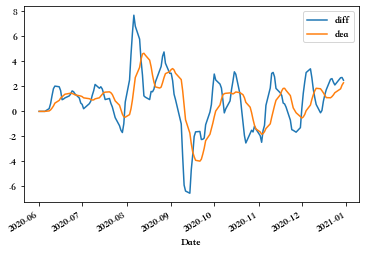

In [60]:
columns = ['diff','dea']
tem_df = df[columns]
tem_df.plot()

In [66]:
# 计算买卖拐点
df['positions'] = (df['diff']>=df['dea']).astype(int).values
df['signals'] = df['positions'].diff()

# 显示结果
df['positions'].values
df['signals'].fillna(0).astype(int).values

# 绘制买卖拐点

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        1,  0,  0, -1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  1,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0])

# 通过可视化进行效果验证

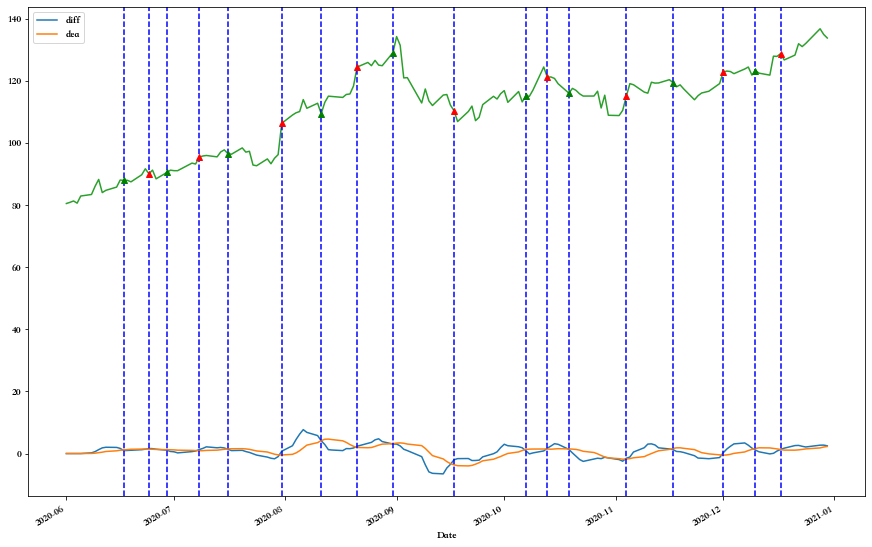

In [80]:
# 绘制买卖拐点
columns = ['Close','signals','diff','dea']
tem_df = df[columns]
tem_df[['diff','dea']].plot()

# 只显示时刻点，不显示折线图 => 设置 linewidth=0
tem_df['Close'].plot(figsize=(15,10))

#添加垂直直线
x_list=tem_df['Close'][(tem_df['signals']==1)|(tem_df['signals']==-1)].index
for x in x_list:
    plt.axvline(x=x,ls="--",c="b")

    
    tem_df['Close'][tem_df['signals']==1].plot(label='Buy', linewidth=0, marker='^', c='r')
tem_df['Close'][tem_df['signals']==-1].plot(label='Sell', linewidth=0, marker='^', c='g')


DatetimeIndex(['2020-06-17', '2020-06-24', '2020-06-29', '2020-07-08',
               '2020-07-16', '2020-07-31', '2020-08-11', '2020-08-21',
               '2020-08-31', '2020-09-17', '2020-10-07', '2020-10-13',
               '2020-10-19', '2020-11-04', '2020-11-17', '2020-12-01',
               '2020-12-10', '2020-12-17'],
              dtype='datetime64[ns]', name='Date', freq=None)